In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.sample(7)

,Gender,Height,Weight
30,Male,68.618111,187.506843
5873,Female,63.132339,130.514736
4481,Male,69.442300,174.885729
3916,Male,68.656492,188.589566
118,Male,67.738963,178.170556
8768,Female,67.599586,159.969308
4865,Male,71.542808,212.443510


In [4]:
df.shape

(10000, 3)

### <b style = color:purple>Getting insights of Height</b>

In [13]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

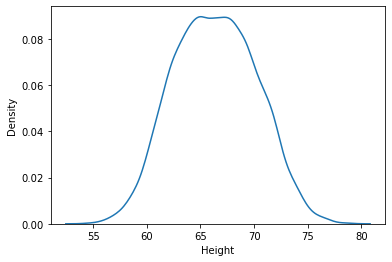

In [5]:
sns.kdeplot(df['Height'])

In [6]:
df['Height'].skew()

0.04936908937689031

<AxesSubplot:xlabel='Height'>

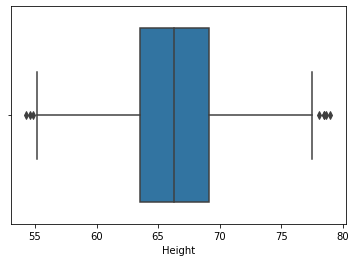

In [8]:
sns.boxplot(x = df['Height'])

### <b style = color:purple>Getting insights of Weight</b>

In [11]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

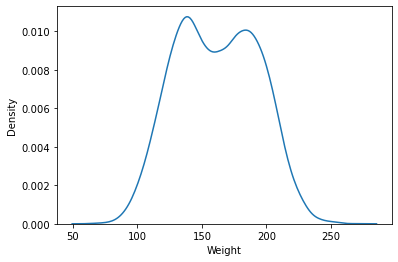

In [9]:
sns.kdeplot(df['Weight'])

In [10]:
df['Weight'].skew()

0.03295450444592437

<AxesSubplot:xlabel='Weight'>

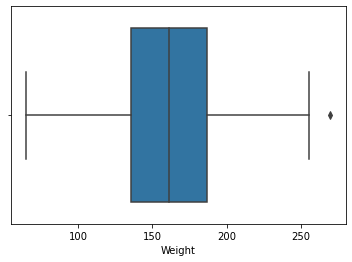

In [12]:
sns.boxplot(x = df['Weight'])

### <b style = color:purple>Working on Height Column as it has outliers.</b>

In [19]:
upper_limit = df['Height'].quantile(0.99)

In [21]:
lower_limit = df['Height'].quantile(0.01)

In [22]:
lower_limit

58.13441158671655

In [28]:
#df['Height'].quantile(np.arange(0.01, 1.01, 0.01))

In [32]:
"""
Detecting how many outliers are there.
"""
df[(df['Height'] > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### <b style = "color:red">Trimming</b>

In [35]:
"""
DataFrame without the outliers.
"""
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]
new_df.shape

(9800, 3)

In [38]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [37]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

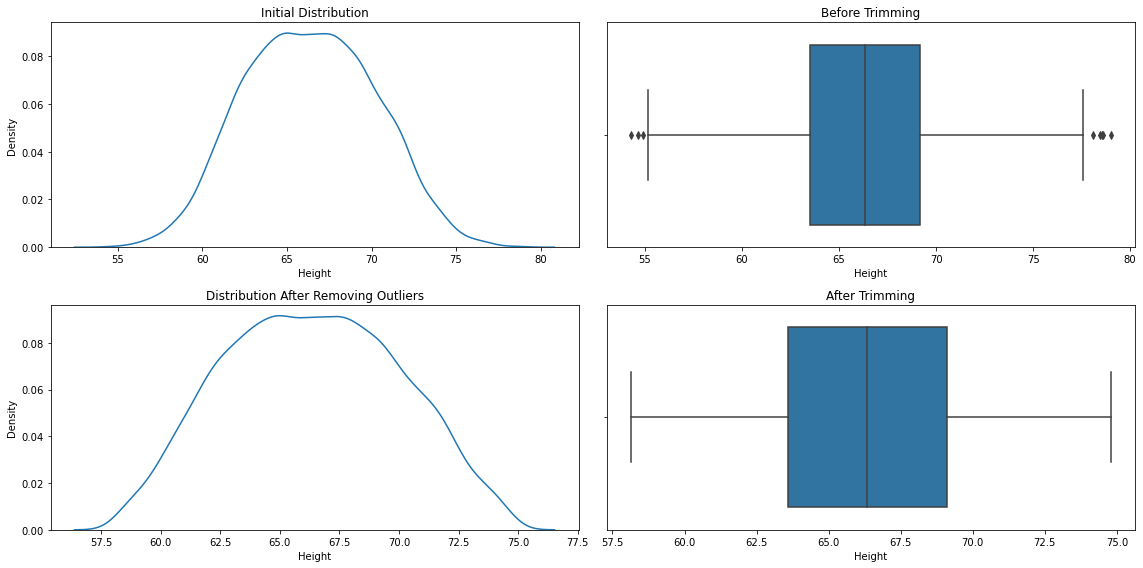

In [50]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.kdeplot(df['Height'])
plt.title("Initial Distribution")

plt.subplot(2,2,2)
sns.boxplot(x = df['Height'])
plt.title("Before Trimming")

plt.subplot(2,2,3)
sns.kdeplot(new_df['Height'])
plt.title("Distribution After Removing Outliers")

plt.subplot(2,2,4)
sns.boxplot(x = new_df['Height'])
plt.title("After Trimming")

plt.tight_layout()
plt.show()

### <b style = "color:red">Winsorization</b>

When we do <b style = "color:orange">capping</b> for <b style = "color:orange">percentile method</b>, it is known as Winsorization.

In [52]:
df['Height'] = np.where(df['Height'] > upper_limit,upper_limit,
        np.where(df['Height'] < lower_limit,lower_limit,df['Height']))

In [53]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

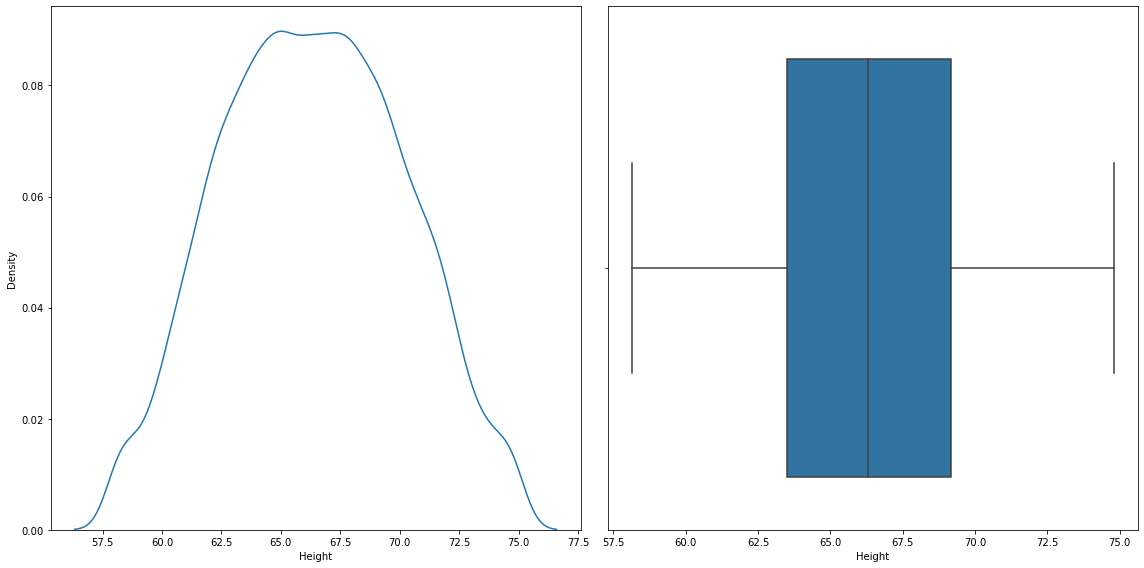

In [56]:
"""
Plotting after Winsorization.
"""

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.kdeplot(df['Height'])

plt.subplot(1,2,2)
sns.boxplot(x = df['Height'])

plt.tight_layout()
plt.show()